In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [4]:
customers = pd.read_csv('customer.csv')

In [37]:
customers.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [38]:
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
customers.DOB = customers.DOB.apply(lambda x : pd.to_datetime(x))

C:\Users\Praveen\AppData\Local\Temp\ipykernel_12852\3940727631.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customers.DOB = customers.DOB.apply(lambda x : pd.to_datetime(x))


In [42]:
customers.dtypes

customer_Id             int64
DOB            datetime64[ns]
Gender                 object
city_code             float64
dtype: object

In [43]:
customers.isna().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [44]:
customers.shape

(5647, 4)

In [5]:
transactions = pd.read_csv('transactions.csv')

In [47]:
transactions.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

In [6]:
transactions.tran_date = transactions.tran_date.apply(lambda x : dt.datetime.strptime(x, "%d-%m-%Y") if '-' in x else dt.datetime.strptime(x, "%d/%m/%Y") )

In [58]:
transactions.tran_date

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [59]:
transactions.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object

In [6]:
transactions.rename(columns = {'cust_id':'customer_Id'} , inplace = True)

In [9]:
x1 = set(transactions['customer_Id'])
x2 = set(customers['customer_Id'])
x1.difference(x2)

set()

In [73]:
transactions.nunique()

transaction_id      20878
customer_Id          5506
tran_date            1129
prod_subcat_code       12
prod_cat_code           6
Qty                    10
Rate                 2551
Tax                  4194
total_amt            5764
Store_type              4
dtype: int64

In [70]:
customers.nunique()

customer_Id    5647
DOB            4056
Gender            2
city_code        10
dtype: int64

In [78]:
prod_cat_info.nunique()

prod_cat_code         6
prod_cat              6
prod_sub_cat_code    12
prod_subcat          18
dtype: int64

In [9]:
transactions.apply(lambda col : col.unique())

transaction_id      [80712190438, 29258453508, 51750724947, 932748...
customer_Id         [270351, 270384, 273420, 271509, 272357, 27366...
tran_date           [2014-02-28 00:00:00, 2014-02-27 00:00:00, 201...
prod_subcat_code              [1, 5, 6, 11, 8, 12, 3, 7, 4, 9, 10, 2]
prod_cat_code                                      [1, 3, 5, 6, 2, 4]
Qty                               [-5, -2, -3, -1, -4, 5, 3, 4, 1, 2]
Rate                [-772, -1497, -791, -1363, -824, -1450, -1225,...
Tax                 [405.3, 785.925, 166.11, 429.345, 173.04, 152....
total_amt           [-4265.3, -8270.925, -1748.11, -4518.345, -182...
Store_type                    [e-Shop, TeleShop, MBR, Flagship store]
dtype: object

In [10]:
prod_cat_info = pd.read_csv('prod_cat_info.csv')

In [76]:
prod_cat_info.dtypes

prod_cat_code         int64
prod_cat             object
prod_sub_cat_code     int64
prod_subcat          object
dtype: object

In [11]:
prod_cat_info.apply(lambda col : col.unique())

prod_cat_code                                       [1, 2, 3, 4, 5, 6]
prod_cat             [Clothing, Footwear, Electronics, Bags, Books,...
prod_sub_cat_code              [4, 1, 3, 5, 8, 9, 10, 7, 12, 11, 6, 2]
prod_subcat          [Mens, Women, Kids, Mobiles, Computers, Person...
dtype: object

In [14]:
customers_final = transactions.merge(customers , on = 'customer_Id' , how = 'left')

In [16]:
customer_final1 = customers_final

In [17]:
customer_final1.rename(columns = {'prod_subcat_code' : 'prod_sub_cat_code'}, inplace = True)

In [18]:
customers_final = customer_final1.merge(prod_cat_info, on = ['prod_cat_code','prod_sub_cat_code'], how = 'left' )

In [19]:
customers_final

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


In [113]:
transactions.shape

(23053, 10)

In [115]:
customers_final.dtypes

transaction_id                int64
customer_Id                   int64
tran_date            datetime64[ns]
prod_sub_cat_code             int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_subcat                  object
dtype: object

In [119]:
customers_final.head()

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY


In [117]:
customers_final.tail()

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


In [20]:
customers_final_continuous = customers_final.select_dtypes(include = 'number')

In [21]:
customers_final_categorical = customers_final.select_dtypes(include = 'object')

In [22]:
customers_final_continuous.drop(columns = ['transaction_id', 'customer_Id', 'prod_sub_cat_code','prod_cat_code','city_code'], inplace = True)

In [128]:
customers_final_categorical.info

<bound method DataFrame.info of       Store_type Gender          prod_cat prod_subcat
0         e-Shop      M          Clothing       Women
1         e-Shop      F       Electronics   Computers
2       TeleShop      M             Books         DIY
3         e-Shop      M  Home and kitchen        Bath
4       TeleShop      M             Books         DIY
...          ...    ...               ...         ...
23048     e-Shop      M             Books    Academic
23049     e-Shop      M          Clothing        Mens
23050        MBR      M  Home and kitchen  Furnishing
23051   TeleShop      M             Books    Children
23052   TeleShop      M             Books    Children

[23053 rows x 4 columns]>

In [137]:
customers_final_continuous.describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


In [152]:
for col in customers_final_categorical:
    print(customers_final_categorical[col].value_counts())
    print("\n")

Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64


Gender
M    11811
F    11233
Name: count, dtype: int64


prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64


prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: count, dtype: int64




In [39]:
customers_continuous['Rate'].nunique()

2551

(array([-2000., -1500., -1000.,  -500.,     0.,   500.,  1000.,  1500.,
         2000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(-1500.0, 0, '−1500'),
  Text(-1000.0, 0, '−1000'),
  Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000')])

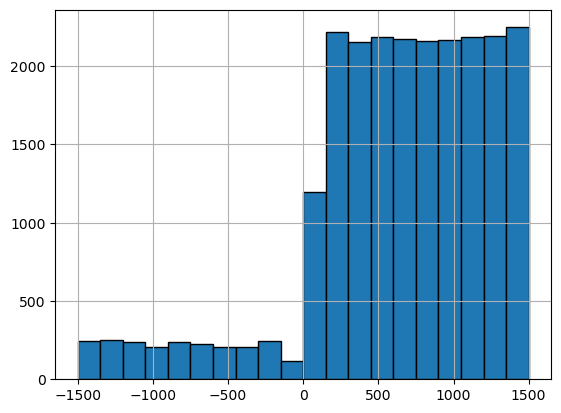

In [40]:
plt.hist(customers_continuous['Rate'], bins = 20, edgecolor = 'black')
plt.grid(True)
plt.xticks()

([<matplotlib.axis.XTick at 0x2236b1b5790>,
 [Text(-5, 0, '−5'),
  Text(-2, 0, '−2'),
  Text(-3, 0, '−3'),
  Text(-1, 0, '−1'),
  Text(-4, 0, '−4'),
  Text(5, 0, '5'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(1, 0, '1'),
  Text(2, 0, '2')])

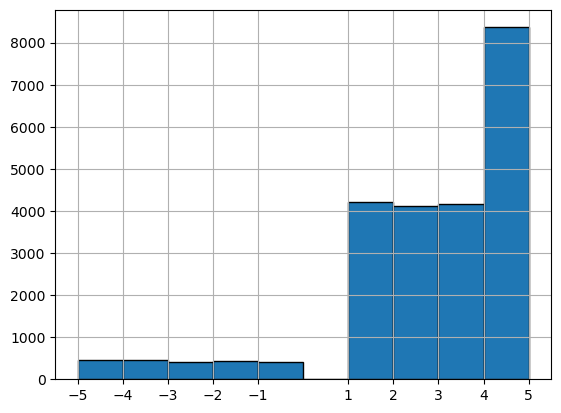

In [43]:
plt.hist(customers_continuous['Qty'], bins = 10, edgecolor = 'black')
plt.grid(True)
plt.xticks(customers_continuous['Qty'].unique())

In [41]:
customers_continuous['Tax'].nunique()

4194

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.,  900.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800'),
  Text(900.0, 0, '900')])

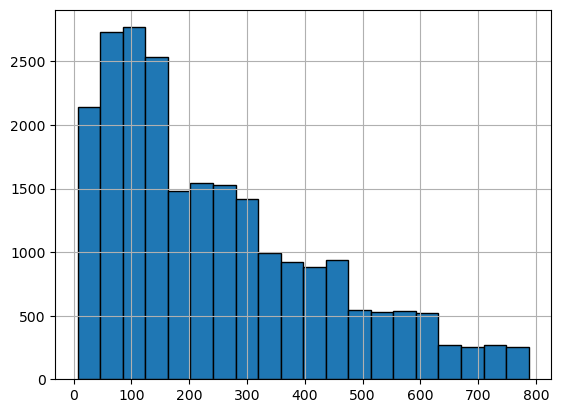

In [42]:
plt.hist(customers_continuous['Tax'], bins = 20, edgecolor = 'black')
plt.grid(True)
plt.xticks()

(array([-10000.,  -7500.,  -5000.,  -2500.,      0.,   2500.,   5000.,
          7500.,  10000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(-7500.0, 0, '−7500'),
  Text(-5000.0, 0, '−5000'),
  Text(-2500.0, 0, '−2500'),
  Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000')])

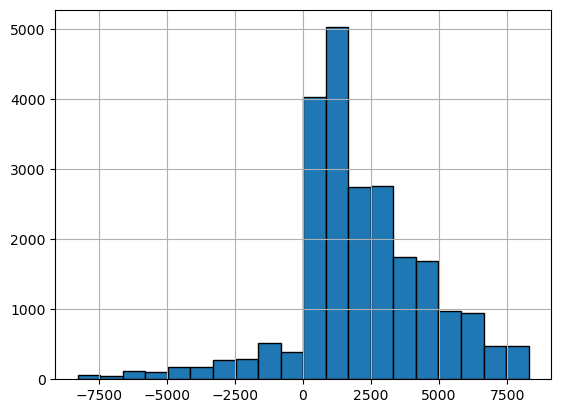

In [44]:
plt.hist(customers_continuous['total_amt'], bins = 20, edgecolor = 'black')
plt.grid(True)
plt.xticks()

In [25]:
customers_continuous

,Qty,Rate,Tax,total_amt
0,-5,-772,405.300,-4265.300
1,-5,-1497,785.925,-8270.925
2,-2,-791,166.110,-1748.110
3,-3,-1363,429.345,-4518.345
4,-2,-791,166.110,-1748.110
...,...,...,...,...
23048,1,1264,132.720,1396.720
23049,1,677,71.085,748.085
23050,4,1052,441.840,4649.840
23051,3,1142,359.730,3785.730


In [47]:
customers_categorical =  customers_final_categorical

In [48]:
customers_categorical

,Store_type,Gender,prod_cat,prod_subcat
0,e-Shop,M,Clothing,Women
1,e-Shop,F,Electronics,Computers
2,TeleShop,M,Books,DIY
3,e-Shop,M,Home and kitchen,Bath
4,TeleShop,M,Books,DIY
...,...,...,...,...
23048,e-Shop,M,Books,Academic
23049,e-Shop,M,Clothing,Mens
23050,MBR,M,Home and kitchen,Furnishing
23051,TeleShop,M,Books,Children


In [53]:
customers_categorical['Gender'].nunique()

2

In [66]:
x = customers_categorical.groupby('prod_subcat').Gender.count().reset_index(name = 'freq')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Academic'),
  Text(1, 0, 'Audio and video'),
  Text(2, 0, 'Bath'),
  Text(3, 0, 'Cameras'),
  Text(4, 0, 'Children'),
  Text(5, 0, 'Comics'),
  Text(6, 0, 'Computers'),
  Text(7, 0, 'DIY'),
  Text(8, 0, 'Fiction'),
  Text(9, 0, 'Furnishing'),
  Text(10, 0, 'Kids'),
  Text(11, 0, 'Kitchen'),
  Text(12, 0, 'Mens'),
  Text(13, 0, 'Mobiles'),
  Text(14, 0, 'Non-Fiction'),
  Text(15, 0, 'Personal Appliances'),
  Text(16, 0, 'Tools'),
  Text(17, 0, 'Women')])

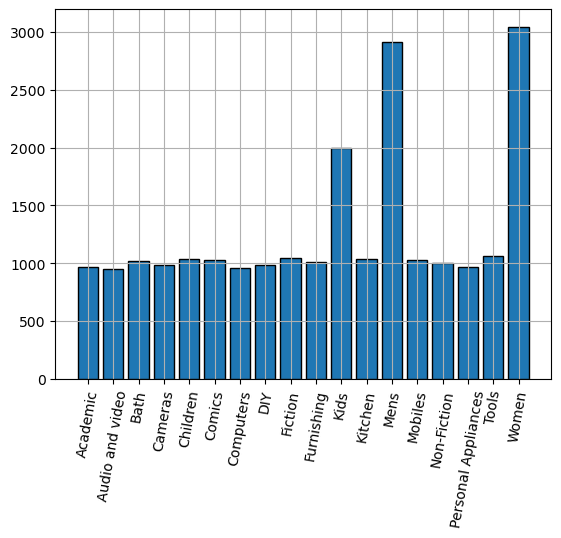

In [70]:
plt.bar(x['prod_subcat'], x['freq'] ,edgecolor = 'black')
plt.grid(True)
plt.xticks(rotation = 80)

In [77]:
(customers_final['tran_date'].max() - customers_final['tran_date'].min())

Timedelta('1130 days 00:00:00')

In [80]:
print(customers_final['tran_date'].min() , "||",customers_final['tran_date'].max())

2011-01-25 00:00:00 || 2014-02-28 00:00:00


In [84]:
customers_final[customers_final['total_amt'] < 0].transaction_id.count()

2177

In [91]:
customers_final[customers_final['Gender'] == 'M'].prod_cat.value_counts().reset_index(name = 'count').sort_values(by = 'count', ascending = False).head(1)

,prod_cat,count
0,Books,3116


In [92]:
customers_final[customers_final['Gender'] == 'F'].prod_cat.value_counts().reset_index(name = 'count').sort_values(by = 'count', ascending = False).head(1)

,prod_cat,count
0,Books,2949


In [116]:
x = customers.groupby('city_code').customer_Id.count().reset_index(name = 'cus_count')

In [117]:
y = customers.customer_Id.count()

In [118]:
x['percen'] = (x['cus_count'] / y) * 100

In [111]:
x.dtypes

city_code    float64
cus_count      int64
percen       float64
dtype: object

In [119]:
x.sort_values(by = 'percen', ascending = False ).head(1)

,city_code,cus_count,percen
2,3.0,595,10.536568


In [127]:
customers_final.groupby('Store_type').Qty.sum().reset_index(name = 'quant_sum').sort_values(by = 'quant_sum', ascending = False).head(1)

,Store_type,quant_sum
3,e-Shop,22763
1,MBR,11194
0,Flagship store,11133
2,TeleShop,10984


In [126]:
customers_final.groupby('Store_type').total_amt.sum().reset_index(name = 'amt_sum').sort_values(by = 'amt_sum', ascending = False).head(1)

,Store_type,amt_sum
3,e-Shop,19824816.05


In [120]:
customers_final

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-11-05,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-08-06,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


In [132]:
customers_final[(customers_final['Store_type'] == 'Flagship store') & (customers_final['prod_cat'].isin(['Electronics' , 'Clothing']))].total_amt.sum()

3409559.27

In [133]:
customers_final[(customers_final['Gender'] == 'M') & (customers_final['prod_cat'].isin(['Electronics']))].total_amt.sum()

5703109.424999999

In [140]:
x = customers_final[customers_final['Qty'] > 0].groupby('customer_Id').transaction_id.nunique().reset_index(name = 'count_transac').sort_values(by= 'count_transac', ascending = False)

In [143]:
x[x['count_transac'] > 10]

,customer_Id,count_transac
3867,272741,11
4032,273014,11
4,266794,11
4815,274227,11
2606,270803,11
2426,270535,11


In [146]:
curr_date = dt.datetime.now()

In [161]:
customers_final['age'] = np.floor((curr_date  - customers_final['DOB']).dt.days / 365.25).astype(int)

In [162]:
customers_final['age']

0        43
1        51
2        32
3        43
4        32
         ..
23048    52
23049    40
23050    48
23051    54
23052    42
Name: age, Length: 23053, dtype: int32

In [166]:
customers_final.drop(columns = {'x'}, inplace = True)

In [199]:
x =customers_final[customers_final['age'].isin(range(25, 36))]

In [200]:
x[x['prod_cat'].isin(['Electronics','Books'])].total_amt.sum()

4042002.705

In [201]:
pd.to_datetime('2014-01-01')

Timestamp('2014-01-01 00:00:00')

In [202]:
x[ (x['tran_date']>= pd.to_datetime('2014-01-01')) &  (x['tran_date']<= pd.to_datetime('2014-03-01')) ].total_amt.sum()

452371.52999999997

In [198]:
for i in range(25, 36):
    print(i)

25
26
27
28
29
30
31
32
33
34
35


In [195]:
a

range(25, 35)

In [204]:
x[ (x['tran_date']>= pd.to_datetime('2014-01-01')) &  (x['tran_date']<= pd.to_datetime('2014-03-01')) ].tran_date.unique()

<DatetimeArray>
['2014-02-24 00:00:00', '2014-02-23 00:00:00', '2014-02-20 00:00:00',
 '2014-02-19 00:00:00', '2014-02-18 00:00:00', '2014-02-17 00:00:00',
 '2014-02-16 00:00:00', '2014-02-15 00:00:00', '2014-02-14 00:00:00',
 '2014-02-13 00:00:00', '2014-02-12 00:00:00', '2014-02-11 00:00:00',
 '2014-02-10 00:00:00', '2014-02-09 00:00:00', '2014-02-08 00:00:00',
 '2014-02-07 00:00:00', '2014-02-06 00:00:00', '2014-02-05 00:00:00',
 '2014-02-04 00:00:00', '2014-02-03 00:00:00', '2014-02-02 00:00:00',
 '2014-02-01 00:00:00', '2014-01-31 00:00:00', '2014-01-30 00:00:00',
 '2014-01-29 00:00:00', '2014-01-28 00:00:00', '2014-01-27 00:00:00',
 '2014-01-26 00:00:00', '2014-01-25 00:00:00', '2014-01-24 00:00:00',
 '2014-01-23 00:00:00', '2014-01-21 00:00:00', '2014-01-20 00:00:00',
 '2014-01-19 00:00:00', '2014-01-18 00:00:00', '2014-01-17 00:00:00',
 '2014-01-16 00:00:00', '2014-01-15 00:00:00', '2014-01-14 00:00:00',
 '2014-01-13 00:00:00', '2014-01-12 00:00:00', '2014-01-11 00:00:00',
 '20